
# 데이터 전처리









## 데이터 확인 (결측치 등)

In [70]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
df = pd.read_csv(url)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

In [71]:
del df['Unnamed: 0']

df.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [72]:
df.isnull().sum()


Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


## 결측치 처리 및 데이터 정리




1.   지역별 출고량 단위 통일 (M, K 문자 제거 M 단위로 통일)
2.   결측치 처리 






In [74]:
def value_unit_change(x):
    if type(x) == float or type(x) == int:      #숫자면 리턴
        return x
    if 'K' in x:
        if float(x.replace('K','')) == 0.0 :    # k 제거한 값이 0 이면
            return 0                            
        return float(x.replace('K', '')) * 0.0001   # 이후 M 단위로 변경
    if 'M' in x:
        if float(x.replace('M','')) == 0.0:     # M 제거한 값이 0 이면
            return 0                            
        return float(x.replace('M', ''))            # M 제거 
    else:                                       
      return float(x)                           # 나머지 주석(M, K) 없는 값 타입 변경



df['EU_Sales'] = df['EU_Sales'].apply(value_unit_change)
df['NA_Sales'] = df['NA_Sales'].apply(value_unit_change)
df['JP_Sales'] = df['JP_Sales'].apply(value_unit_change)
df['Other_Sales'] = df['Other_Sales'].apply(value_unit_change)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [75]:
df.dtypes 

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [76]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [77]:

pd.DataFrame(df['Year'].value_counts())



,Year
2009.0,1421
2008.0,1418
2010.0,1252
2007.0,1199
2011.0,1129
...,...
13.0,2
12.0,2
86.0,1
2020.0,1


In [78]:
df.loc[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.210
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.000
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.010
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0.00,0.00,0.000
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0.00,0.00,0.17,0.030
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.000
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.030
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.005
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.000


In [79]:
def Year_retutn(x):
  if x <= 20:
    return x + 2000
  if x > 20 and x < 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(Year_retutn)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [80]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [81]:
df['Publisher'] = df['Publisher'].replace(np.nan, 'Unknown')


In [82]:
df.isnull().sum()


Name             0
Platform         0
Year           271
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [83]:
df.loc[df['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.520,0.010,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.370,0.110,0.00,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.490,0.150,0.00,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.000,0.040,0.00,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,0.517,4.050,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.230,0.160,0.00,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.130,0.050,0.00,0.00
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.250,0.020,0.00,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.030,0.000,0.00,0.00
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.070,0.020,0.00,0.00


In [84]:
df = df.dropna(axis=0, how='any') # how 결측치가 1개라도 존재시 drop

In [85]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [86]:
df.shape

(16277, 9)

In [87]:
df['total sales'] = df.loc[:, 'NA_Sales':'Other_Sales'].sum(axis=1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [88]:
df['year_sales'] = df['total sales'] / (2020- df['Year'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales,year_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.003333
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.016364
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.002000
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.004000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.025000
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.014286
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.000667
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.158000
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.054286


### 데이터 전처리 끝

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

## 출고율이 가장 높은 게임에 대한 분석 및 시각화



1.   총매출이 높은 게임들의 플랫폼 비교
2.   상위 플랫폼 게임 비교



In [89]:

df_total_sales = df.sort_values(by='total sales', ascending=False).reset_index(drop=True)

df_total_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total sales,year_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.490,29.02,3.770,8.46,82.740,5.910000
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.080,3.58,6.810,0.77,40.240,1.149714
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.850,12.88,3.790,3.31,35.830,2.985833
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.750,11.01,3.280,2.96,33.000,3.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.270,8.89,10.220,1.00,31.380,1.307500
...,...,...,...,...,...,...,...,...,...,...,...
16272,Hyakki Yagyou Kaidan Romance,PSP,2012.0,Action,Quinrose,0.000,0.00,0.001,0.00,0.001,0.000125
16273,The Humans: Meet the Ancestors!,DS,2009.0,Puzzle,Deep Silver,0.001,0.00,0.000,0.00,0.001,0.000091
16274,The Cages: Pro Style Batting Practice,Wii,2010.0,Sports,Konami Digital Entertainment,0.001,0.00,0.000,0.00,0.001,0.000100
16275,Rakushou! Pachi-Slot Sengen 4,PS2,2006.0,Misc,Tecmo Koei,0.000,0.00,0.001,0.00,0.001,0.000071


In [90]:
df1_total_sales = df.sort_values(by='year_sales', ascending=False).reset_index(drop=True)


In [91]:
vla = list(df_total_sales['Platform'].value_counts().index)
df_total_sales = df_total_sales[['Name','Genre','Platform','total sales']].head(100)

df1_total_sales = df1_total_sales[['Name','Genre','Platform','year_sales']].head(100)


총매출이 높은 상위 100개의 게임 플렛폼 비교

In [92]:
import plotly.express as px
fig = px.pie(df_total_sales, values= 'total sales', names= 'Platform')
fig.show()

총매출이높은 최근 상위 데이터 

In [104]:

fig = px.pie(df1_total_sales, values= 'year_sales', names= 'Platform')
fig.show()



갈수록 플렛폼의 차별화 보다는 점유률 10% 안에 드는 플렛폼으로 게임 출시하는게 유리하다고 보임

In [94]:
df1 = df1_total_sales[df1_total_sales['Platform']=='Wii']

fig = px.pie(df1, values= 'year_sales', names= 'Genre')
fig.show()


In [107]:
df1_total_sales[df1_total_sales['Platform']=='PS3']

,Name,Genre,Platform,year_sales
2,Grand Theft Auto V,Action,PS3,3.055714
14,Call of Duty: Black Ops II,Shooter,PS3,1.755000
23,Call of Duty: Modern Warfare 3,Shooter,PS3,1.496667
28,Call of Duty: Ghosts,Shooter,PS3,1.368571
35,Call of Duty: Black Ops,Shooter,PS3,1.273000
51,Gran Turismo 5,Racing,PS3,1.077000
54,FIFA Soccer 13,Action,PS3,1.031250
57,FIFA 14,Sports,PS3,0.985714
60,Call of Duty: Modern Warfare 2,Shooter,PS3,0.971818
66,Minecraft,Misc,PS3,0.903333


매출이 높은 플렛폼(wii)에서 스포츠장르가 인기가 좋다

In [95]:
df1['New'] = ['Wii Sports','Wii Sports','Mario','Mario','Wii Play','Wii Fit','Wii Fit','Just Dance','Super','Just Dance','Super Mario Galaxy','Just Dance','Super Mario Galaxy']
fig = px.pie(df1, values= 'year_sales', names= 'New')
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



시리즈 게임이 매출이 높다

In [109]:
df2 = df1_total_sales[df1_total_sales['Platform']=='PS3']

fig = px.pie(df2, values= 'year_sales', names= 'Genre')
fig.show()
df1_total_sales[df1_total_sales['Platform']=='PS3']

,Name,Genre,Platform,year_sales
2,Grand Theft Auto V,Action,PS3,3.055714
14,Call of Duty: Black Ops II,Shooter,PS3,1.755000
23,Call of Duty: Modern Warfare 3,Shooter,PS3,1.496667
28,Call of Duty: Ghosts,Shooter,PS3,1.368571
35,Call of Duty: Black Ops,Shooter,PS3,1.273000
51,Gran Turismo 5,Racing,PS3,1.077000
54,FIFA Soccer 13,Action,PS3,1.031250
57,FIFA 14,Sports,PS3,0.985714
60,Call of Duty: Modern Warfare 2,Shooter,PS3,0.971818
66,Minecraft,Misc,PS3,0.903333


매출이 높은 플랫폼(PS3) 에서 슈팅장르가 잘나간다

In [97]:
df2['New'] = ['Grand Theft Auto','Call of Duty','Call of Duty','Call of Duty','Call of Duty','Gran Turismo','FIFA','FIFA','Call of Duty','Minecraft','Grand Theft Auto','The Last of Us','Battlefield','FIFA','Uncharted','FIFA','Call of Duty','The Elder Scrolls V']
fig = px.pie(df2, values= 'year_sales', names= 'New')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



시리즈성 게임들이 잘나간다

##연도별 게임의 트렌드가 있을까.

In [98]:
df_year_Genre = df.groupby(['Year','Genre']).size().reset_index()
df_year_Genre.rename(columns = {0:'Value'},inplace=True)

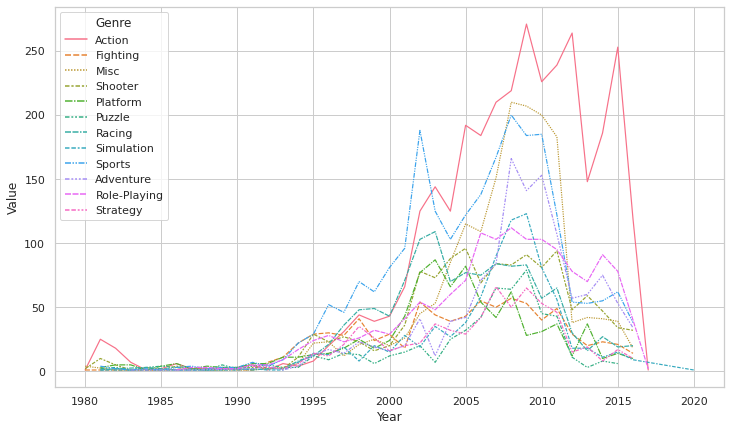

In [99]:
plt.figure(figsize=(12, 7))
sns.set_theme(style='whitegrid')
sns.lineplot(data=df_year_Genre, x='Year', y='Value',hue="Genre",style="Genre",linewidth=1.2)

액션장르가 꾸준히 높은 수치다

특히 2005년도 부터 2015년도 사이 가장 성장률이 좋다

1995년 부터 2005년 전까지 스포츠 게임이 성장률이 좋았다

2000년도 부터 2010년도 까지 게임 출시률이 급증한다



분석결과

장르 : 액션



## 지역에 따라서 선호하는 게임장르

In [100]:
df_Preference = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_Preference


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [101]:
df_Preference = df_Preference.groupby('Genre').sum()


df_Preference

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,852.453,509.842,155.557,183.171
Adventure,101.677,63.584,51.836,16.628
Fighting,219.621,98.649,86.978,36.024
Misc,396.906,208.274,103.973,72.623
Platform,442.401,199.489,130.341,51.144
Puzzle,121.517,50.435,56.240,12.440
Racing,349.759,234.463,56.086,76.204
Role-Playing,317.671,183.073,339.483,56.073
Shooter,572.095,307.224,38.144,101.554


In [102]:
df_Preference = df_Preference.transpose()
df_Preference

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,852.453,101.677,219.621,396.906,442.401,121.517,349.759,317.671,572.095,178.847,664.560,67.152
EU_Sales,509.842,63.584,98.649,208.274,199.489,50.435,234.463,183.073,307.224,112.180,370.313,44.848
JP_Sales,155.557,51.836,86.978,103.973,130.341,56.240,56.086,339.483,38.144,62.415,134.553,48.956
Other_Sales,183.171,16.628,36.024,72.623,51.144,12.440,76.204,56.073,101.554,31.257,131.927,11.032


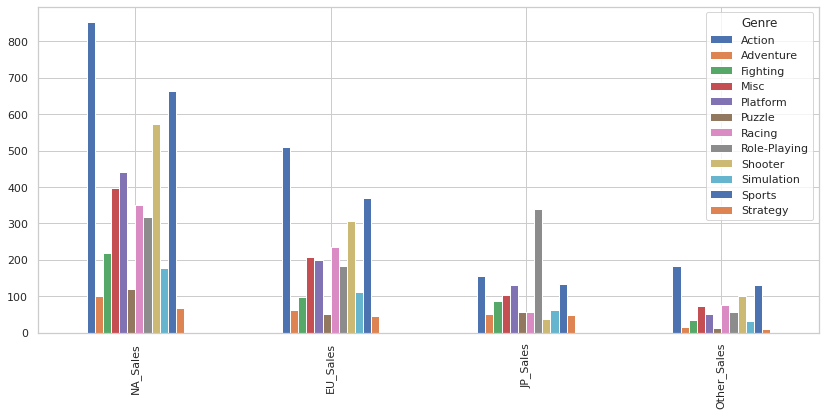

In [103]:
df_Preference.plot(y=list(df_Preference.columns), kind='bar',figsize=(14,6))
plt.show()

시장이 큰 순서대로


1.  NA : 액션 < 스포츠 ...
2.  EU : 액션 < 스포츠 ...
3.  JP : 롤 플레잉 < 액션 ...
4.  그외 국가들 : 액션 < 스포츠...





## 분석결과



*    플랫폼 : PS 
*   장르 : 슈팅 시리즈
*  출시국가 : 유럽 & 북미

